<a href="https://colab.research.google.com/github/Animesh26526/Email-Spam-Detection-Model/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/emails.csv')

In [ ]:
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


from matplotlib import pyplot as plt
_df_0['spam'].plot(kind='hist', bins=20, title='spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['spam'].plot(kind='line', figsize=(8, 4), title='spam')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='spam', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['text'])

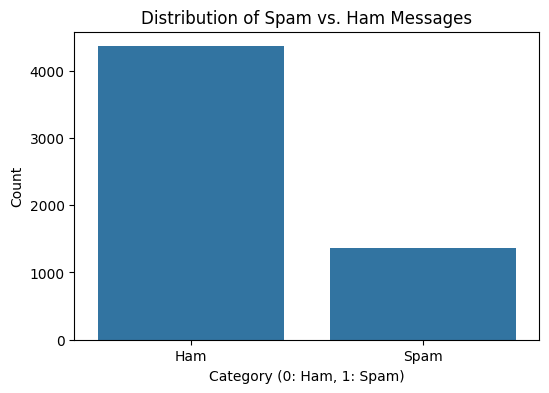

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='spam', data=dataset)
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Category (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, dataset['spam'], test_size = 0.2)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
yPred = model.predict(X_test)
accuracy = accuracy_score(y_test, yPred)
print(accuracy)

0.9912739965095986


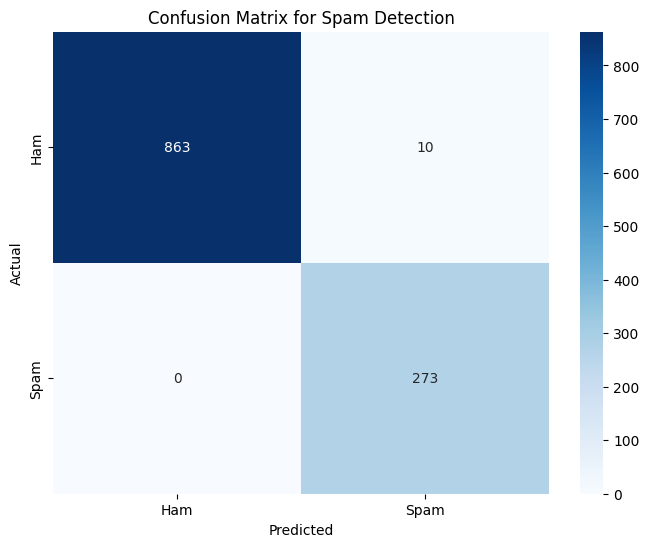

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, yPred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Spam Detection')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, yPred, target_names=['Ham', 'Spam'])
print(report)

              precision    recall  f1-score   support

         Ham       1.00      0.99      0.99       873
        Spam       0.96      1.00      0.98       273

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
def predictMessage(message):
  messageVector = vectorizer.transform([message])
  prediction = model.predict(messageVector)
  return 'Spam' if prediction[0] == 1 else 'Ham'

In [ ]:
userMessage = input("Enter text to Predict:")
prediction = predictMessage(userMessage)
print(f"The Message is {prediction}")

Enter text to Predict:Hey! Wanna buy an IPhone. Get best deals with additional discounts here! 
The Message is Spam
